# 유방암 데이터
- 10, 5, 2 차원으로 차원축소
- 원본과 차원축소한 데이터의 분류 정확도 측정
- 2차원으로 축소한 것은 시각화
- 군집화하기

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 데이터 정규화

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

### 차원 축소

In [8]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca5 = PCA(n_components=5)
pca10 = PCA(n_components=10)

In [9]:
cancer_pca2 = pca2.fit_transform(cancer_std)
cancer_pca5 = pca5.fit_transform(cancer_std)
cancer_pca10 = pca10.fit_transform(cancer_std)

### 분류 정확도

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2021
    )
    dtc = DecisionTreeClassifier(random_state=2021)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc = accuracy_score(y_test, pred)
    return np.round(acc, 4)

In [13]:
print('PCA 2 정확도:', pca_accuracy(cancer_pca2, cancer.target))
print('PCA 5 정확도:', pca_accuracy(cancer_pca5, cancer.target))
print('PCA 10 정확도:', pca_accuracy(cancer_pca10, cancer.target))
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9211
PCA 5 정확도: 0.9649
PCA 10 정확도: 0.9912
원데이터 정확도: 0.8947


### 2차원 축소 데이터 시각화

In [15]:
cancer_pca_df = pd.DataFrame(data=cancer_pca2, columns=['PC1','PC2'])
cancer_pca_df['target'] = cancer.target

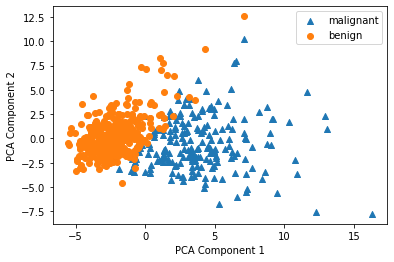

In [16]:
markers=['^', 'o']

# PC1 을 x축, PC2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = cancer_pca_df[cancer_pca_df['target']==i]['PC1']
    y_axis_data = cancer_pca_df[cancer_pca_df['target']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 군집화하기

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)
kmeans.fit(cancer_std)

KMeans(n_clusters=2, random_state=2021)

In [19]:
cancer_pca_df['cluster'] = kmeans.labels_
cancer_pca_df.head()

,PC1,PC2,target,cluster
0,9.192837,1.948583,0,0
1,2.387802,-3.768172,0,0
2,5.733896,-1.075174,0,0
3,7.122953,10.275589,0,0
4,3.935302,-1.948072,0,0


- 시각화하기

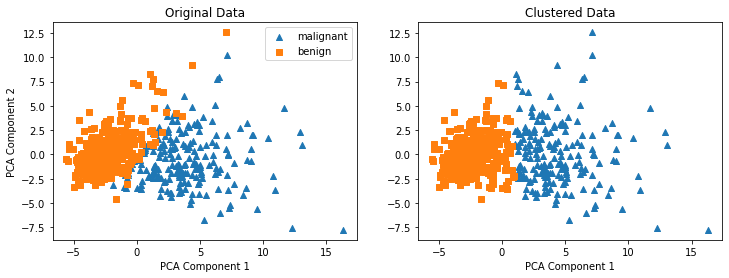

In [21]:
markers = ['^', 's']
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = cancer_pca_df[cancer_pca_df[column] == i]['PC1']
        y_axis_data = cancer_pca_df[cancer_pca_df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                   label=cancer.target_names[i])

    if k==0:    # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else:       # cluster인 경우
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

### globals() 활용하기

- 전역 변수를 딕셔너리에 담아두기

In [24]:
for dim in [2, 5, 10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancerPCA{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc = pca_accuracy(globals()[f'cancerPCA{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9211
PCA 5 정확도: 0.9649
PCA 10 정확도: 0.9912
원데이터 정확도: 0.8947
